<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{0.01}x & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

<font color='green'>
    La probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es: 38.34%
</font>

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

<font color='green'>
    La probabilidad que una computadora se descomponga antes de registrar 100 horas de uso es: 63.21%
</font>
 

La probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es: 38.34%
La probabilidad que una computadora se descomponga antes de registrar 100 horas de uso es: 63.21%


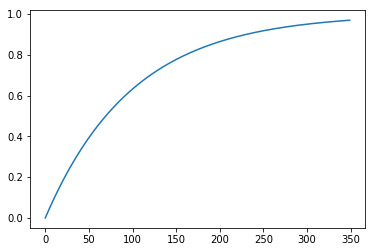

In [52]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

param_lambda = 0.01

x = np.arange(0.0, 350.0, 1.0)

# Hallar la F.d.a. de X
fda = 1 - np.exp(-x*param_lambda)

plt.plot(x, fda);


#¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

p_50_150 = fda[150] - fda[50]

print("La probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse es: {:.2f}%".format(float(p_50_150)*100))

p_100 = fda[100]

print("La probabilidad que una computadora se descomponga antes de registrar 100 horas de uso es: {:.2f}%".format(float(p_100)*100))


## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.


<font color='green'>
    Al modificar la media poblacional (mu) el centro de la campana de gauss se desplaza al nuevo valor mu. Esto es por que al cambiar la media poblacional no moficamos la fundion de distribucion con lo cual los valores se siguen concentrando alrededor de mu.
    <br/><br/>
    Al modificar sigma pueden ocurrir una de dos cosas: 
    <ul> 
        <li> Si aumento sigma la campana se aplana, es decir, los valores se esparcen alejandose de la media.</li>
        <li> Si disminuyo sigma la campana se vuelve estrecha, concentrando la mayoría de valores alrededor de la media</li>
            
    </ul> 
    <br/>
    También probamos modificar el número de muestras. Observamos que a medida que el número de muestras disminuye la distribucion de la muestra se aleja de la normal y aumenta el error en los valores de media y varianza muestral.
    
</font>

In [88]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 20
sigma = 6

rng = range(-20,80)

In [95]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean      20.018713
std        6.004863
min       -1.966766
25%       15.985432
50%       20.041253
75%       24.107969
max       42.376715


/Users/rbechler/miniconda2/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


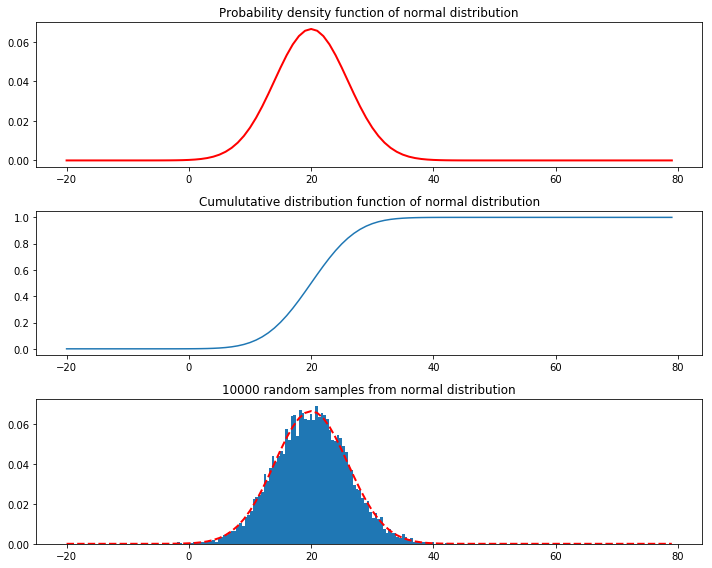

In [96]:
graphic_normal(mu, sigma, rng)